# Data Preparation

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20, 10)

In [2]:
funnel=pd.read_csv('/content/finprod_funnel_(1)_(1).csv')
loans =pd.read_csv('/content/finprod_loans_(1)_(1).csv')
merchants=pd.read_csv('/content/finprod_merchants_(1)_(1).csv')

# Data Exploration

## Funnel Data

In [7]:
funnel.info()
## some fields are not in right data type, such as action_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420881 entries, 0 to 420880
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   merchant_id  420881 non-null  object
 1   user_id      420880 non-null  object
 2   checkout_id  420880 non-null  object
 3   action       420880 non-null  object
 4   action_date  420880 non-null  object
dtypes: object(5)
memory usage: 16.1+ MB


In [8]:
funnel.head()
# user_id: only populated after the user logins when ‘Loan Terms Run’ action takes place, otherwise showing 0
# action_date needs to be converted into consistent format

,merchant_id,user_id,checkout_id,action,action_date
0,D59QS30LK6F2IYOA,2291-6569-ZLWO,MP7KTW20X4LVWDQB,Checkout Loaded,3/31/16 0:00
1,3XGCFF8YUFM65WSM,4927-7293-MJWN,UTYSI56OMVL9JW0C,Checkout Loaded,1/29/16 0:00
2,H7GADDVO9CIZHMCL,0,2QV1BSCTSMBL6M0M,Checkout Loaded,3/5/16 0:00
3,MNLK8D11U6PV4THN,0,ZM2PFHD1UUQBZHAC,Checkout Loaded,3/27/16 0:00
4,H7GADDVO9CIZHMCL,0,CLPU7LY5JMOZQ7LU,Checkout Loaded,3/9/16 0:00


In [9]:
funnel.describe()
# only 18 merchants data within the dataset
# 84 days data
# 4 actions: "Checkout Loaded" = checkout page was loaded, "Loan Terms Run" = user applied for a loan,
#            "Loan Terms Approved" = user was approved for a loan, "Checkout Completed" = user took the loan for which they were approved

,merchant_id,user_id,checkout_id,action,action_date
count,420881,420880,420880,420880,420880
unique,18,82765,196721,4,84
top,YKHCNPR33GOHG3M6,0,6V0L9HCF80WE4JWQ,Checkout Loaded,2/5/16 0:00
freq,187253,65225,4,192299,5984


In [10]:
# convert the action_date data format
funnel['action_date']=pd.to_datetime(funnel['action_date'],format='%m/%d/%y %H:%M').dt.date

In [11]:
# first step data exploration of user_count by actions
funnel[funnel['user_id'] != 0].groupby('action')['user_id'].count()

,user_id
action,
Checkout Completed,39469
Checkout Loaded,192299
Loan Terms Approved,61513
Loan Terms Run,127599


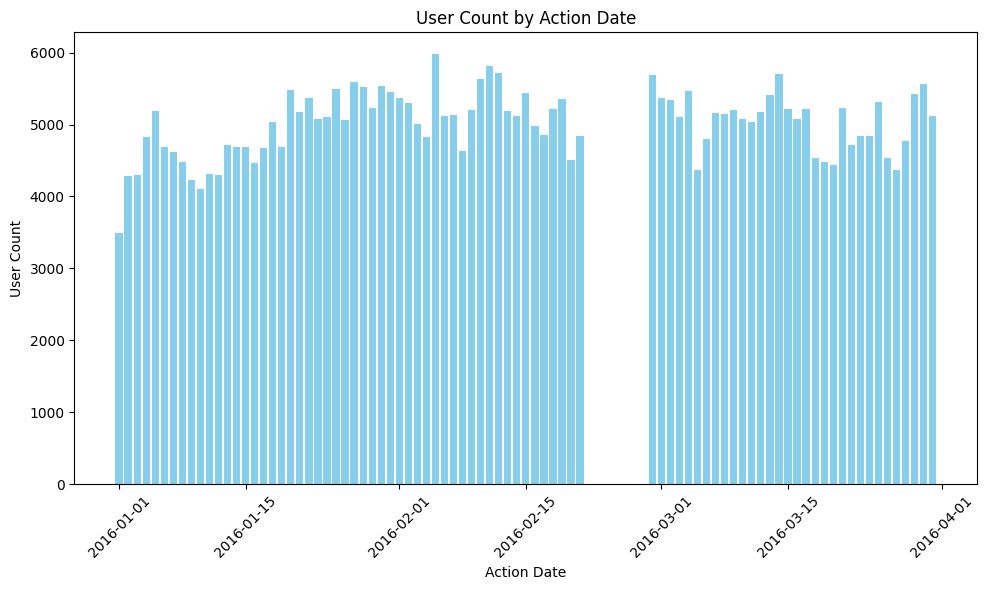

In [12]:
# visualize the user_count by action_date

# Group by 'action_date' and count 'user_id'
user_counts = funnel[funnel['user_id'] != 0].groupby('action_date')['user_id'].count().reset_index(name='user_count')

# Plotting the column chart
plt.figure(figsize=(10, 6))
plt.bar(user_counts['action_date'], user_counts['user_count'], color='skyblue')

# Adding labels and title
plt.xlabel('Action Date')
plt.ylabel('User Count')
plt.title('User Count by Action Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

## lack of some data

## Merchants data

In [13]:
merchants.info()
# 18 merchants data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   merchant_id    18 non-null     object
 1   merchant_name  18 non-null     object
 2   category       18 non-null     object
dtypes: object(3)
memory usage: 560.0+ bytes


In [14]:
merchants.head()

,merchant_id,merchant_name,category
0,D59QS30LK6F2IYOA,Mozzarella Factory,Furniture
1,2ZOAIY64Q3G5QU6Q,American Inc.,Jewelry
2,XG9744A6PCIJXTVB,Monterey Jack Sparrow,Furniture
3,P2T82BO89LRD4WYH,Brie Corp.,Music
4,I19WHSQA1OEG7OLK,Halloumi Boards,Jewelry


In [15]:
merchants.describe()
# 18 id, but 17 unique name. Two merchants with same name? -- Roquefort NYC in music category

,merchant_id,merchant_name,category
count,18,18,18
unique,18,17,4
top,D59QS30LK6F2IYOA,Roquefort NYC,Music
freq,1,2,6


In [26]:
merchants.groupby('category')['merchant_id'].count()
#visualize the industry distribution

,merchant_id
category,
Apparel,4
Furniture,5
Jewelry,3
Music,6


## Loans data


In [16]:
loans.info()
# some columns not in right data type, such as checkout_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43687 entries, 0 to 43686
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant_id             43687 non-null  object 
 1   user_id                 43687 non-null  object 
 2   checkout_id             43687 non-null  object 
 3   checkout_date           43687 non-null  object 
 4   loan_amount             43687 non-null  float64
 5   down_payment_amount     43687 non-null  float64
 6   users_first_capture     43687 non-null  object 
 7   user_dob_year           43687 non-null  int64  
 8   loan_length_months      43687 non-null  int64  
 9   mdr                     43687 non-null  float64
 10  apr                     43687 non-null  float64
 11  fico_score              43687 non-null  int64  
 12  loan_return_percentage  43687 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 4.3+ MB


In [18]:
loans.head()
## need to convert checkout_date to consistent date type
# users_first_capture provides the info of whether the customer is repeat user or not
# user_dob_year could be categoried
# fico_score should be explored as well
# how to calculate the revenue with mdr, apr, loan_return_percentage?

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019


In [ ]:
loans.describe()
# lots of customers don't provide down payment
# why there're some records without loan amount?
# users range from 1899 to 1997
# some users have no fico_score, ranging from 450 to 850

,loan_amount,down_payment_amount,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage
count,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000
mean,760.813632,25.073145,1975.162543,8.758029,0.032777,0.195146,649.448326,0.060408
std,924.629640,184.794586,11.614734,3.662579,0.023479,0.123484,95.882933,0.177156
min,0.230000,0.000000,1899.000000,1.000000,0.000000,0.000000,0.000000,-0.999800
25%,210.000000,0.000000,1968.000000,6.000000,0.019000,0.000000,614.000000,0.039800
50%,513.000000,0.000000,1976.000000,12.000000,0.019000,0.250000,648.000000,0.093600
75%,950.000000,0.000000,1984.000000,12.000000,0.059000,0.300000,691.000000,0.147200
max,34020.000000,16520.000000,1997.000000,18.000000,0.200000,0.300000,850.000000,0.200000


In [20]:
# convert the checkout_date data format
loans['checkout_date']=pd.to_datetime(loans['checkout_date'],format='%m/%d/%y %H:%M').dt.date

In [29]:
loans['revenue'] = (loans['mdr'] + loans['loan_return_percentage']) * loans['loan_amount']

In [31]:
loans.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,revenue
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2016-02-06,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,32.3300
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2016-02-01,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,124.8900
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,2016-03-31,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,99.7900
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,2016-03-28,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,128.1550
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,2016-01-05,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,138.2131


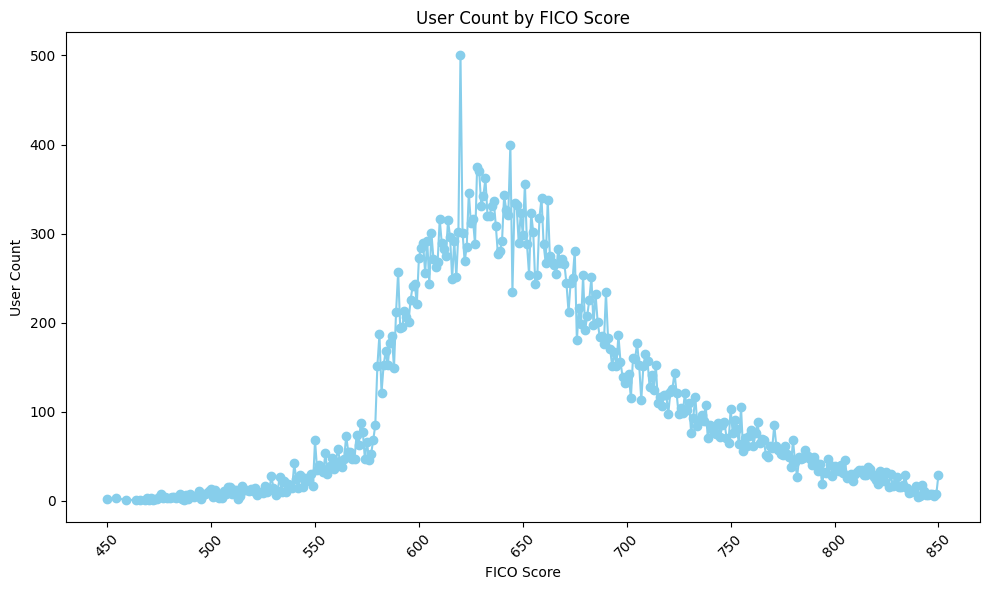

In [19]:
# exclude the customers without fico_score
fico_user_counts = loans[loans['fico_score']!=0].groupby('fico_score')['user_id'].count().reset_index(name='user_count')

# Plotting the column chart
plt.figure(figsize=(10, 6))
plt.plot(fico_user_counts['fico_score'], fico_user_counts['user_count'], color='skyblue', marker='o')

# Adding labels and title
plt.xlabel('FICO Score')
plt.ylabel('User Count')
plt.title('User Count by FICO Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

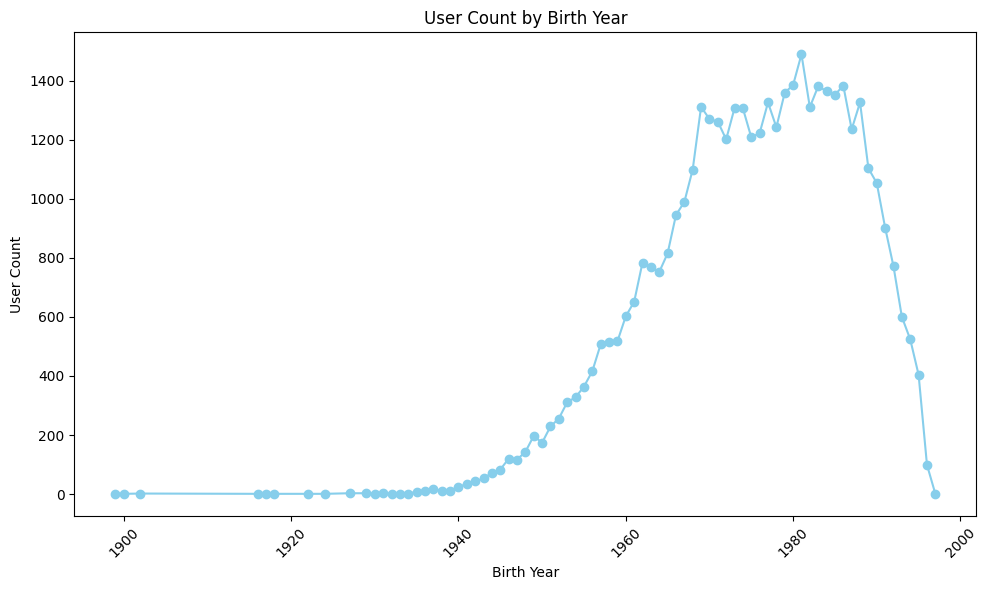

In [28]:
# visualize user profile like birth year
year_user_counts = loans.groupby('user_dob_year')['user_id'].count().reset_index(name='user_count')

# Plotting the column chart
plt.figure(figsize=(10, 6))
plt.plot(year_user_counts['user_dob_year'], year_user_counts['user_count'], color='skyblue', marker='o')

# Adding labels and title
plt.xlabel('Birth Year')
plt.ylabel('User Count')
plt.title('User Count by Birth Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

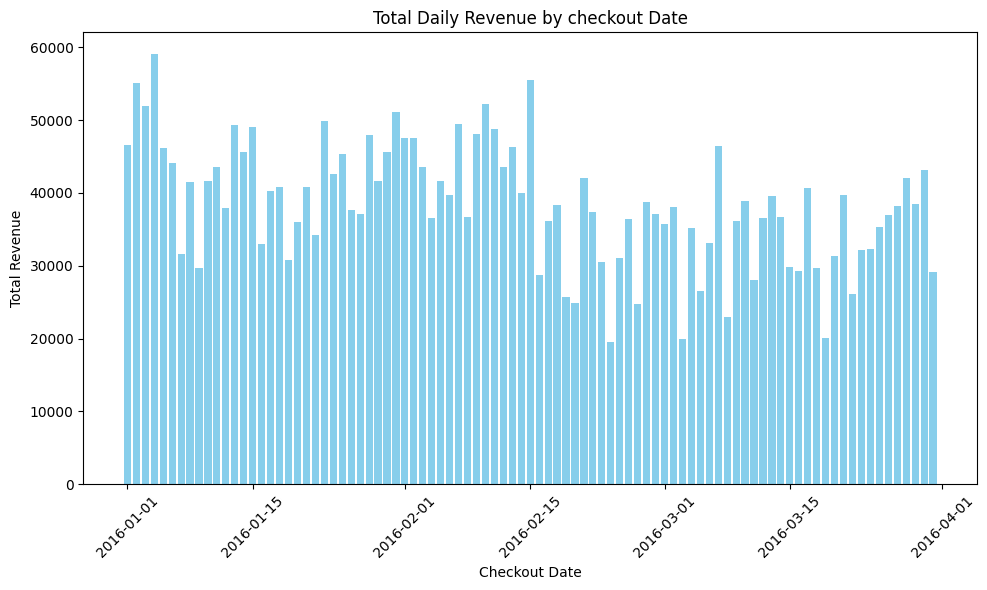

In [32]:
# visualize the revenue by checkout_date

# Group by 'action_date' and count 'user_id'
revenue_sum = loans.groupby('checkout_date')['revenue'].sum().reset_index(name='total_revenue')

# Plotting the column chart
plt.figure(figsize=(10, 6))
plt.bar(revenue_sum['checkout_date'], revenue_sum['total_revenue'], color='skyblue')

# Adding labels and title
plt.xlabel('Checkout Date')
plt.ylabel('Total Revenue')
plt.title('Total Daily Revenue by checkout Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the chart
plt.show()

# Merged table for further data exploration


## funnel & industry

In [22]:
# merge funnel and merchants tables to insights of industry segmentation in each funnel action
m_funnel = pd.merge(funnel, merchants, on='merchant_id', how='left')

In [23]:
m_funnel.head(10)

,merchant_id,user_id,checkout_id,action,action_date,merchant_name,category
0,D59QS30LK6F2IYOA,2291-6569-ZLWO,MP7KTW20X4LVWDQB,Checkout Loaded,2016-03-31,Mozzarella Factory,Furniture
1,3XGCFF8YUFM65WSM,4927-7293-MJWN,UTYSI56OMVL9JW0C,Checkout Loaded,2016-01-29,Bagels & Cream,Apparel
2,H7GADDVO9CIZHMCL,0,2QV1BSCTSMBL6M0M,Checkout Loaded,2016-03-05,Roquefort NYC,Music
3,MNLK8D11U6PV4THN,0,ZM2PFHD1UUQBZHAC,Checkout Loaded,2016-03-27,Pepperjack Co.,Furniture
4,H7GADDVO9CIZHMCL,0,CLPU7LY5JMOZQ7LU,Checkout Loaded,2016-03-09,Roquefort NYC,Music
5,H7GADDVO9CIZHMCL,8012-5297-ZMNY,RIXCCJN2ESZYQNOP,Checkout Loaded,2016-03-20,Roquefort NYC,Music
6,YKHCNPR33GOHG3M6,4686-0764-ESYX,AS4LZBRCY8Q4BP9S,Checkout Loaded,2016-03-26,Cheddar Inc.,Apparel
7,YKHCNPR33GOHG3M6,3569-9189-SZPW,8MOH32LAFI1BXZ49,Checkout Loaded,2016-03-30,Cheddar Inc.,Apparel
8,YKHCNPR33GOHG3M6,5015-8728-QWMP,3F0SAZ7B52WO049W,Checkout Loaded,2016-01-05,Cheddar Inc.,Apparel
9,I19WHSQA1OEG7OLK,0,VHNG48R4MLBPDOPX,Checkout Loaded,2016-03-09,Halloumi Boards,Jewelry


In [40]:
m_funnel['month'] = pd.to_datetime(m_funnel['action_date']).dt.to_period('M')

# Step 3: Aggregate the counts for each action
user_counts = m_funnel.groupby(['month', 'category']).agg(
    num_loaded=pd.NamedAgg(column='user_id', aggfunc=lambda x: (m_funnel.loc[x.index, 'action'] == 'Checkout Loaded').sum()),
    num_applied=pd.NamedAgg(column='user_id', aggfunc=lambda x: (m_funnel.loc[x.index, 'action'] == 'Loan Terms Run').sum()),
    num_approved=pd.NamedAgg(column='user_id', aggfunc=lambda x: (m_funnel.loc[x.index, 'action'] == 'Loan Terms Approved').sum()),
    num_confirmed=pd.NamedAgg(column='user_id', aggfunc=lambda x: (m_funnel.loc[x.index, 'action'] == 'Checkout Completed').sum())
).reset_index()

# Step 4: Calculate the rates, handling division by zero
user_counts['application_rate'] = (user_counts['num_applied'] / user_counts['num_loaded'].replace(0, pd.NA)).round(2)
user_counts['approval_rate'] = (user_counts['num_approved'] / user_counts['num_loaded'].replace(0, pd.NA)).round(2)
user_counts['confirmation_rate'] = (user_counts['num_confirmed'] / user_counts['num_loaded'].replace(0, pd.NA)).round(2)

# Step 5: Sort the result by month and category
user_counts = user_counts.sort_values(by=['month', 'category'])

# Display the result
print(user_counts)

      month   category  num_loaded  num_applied  num_approved  num_confirmed  \
0   2016-01    Apparel       31685        23740         14625           9399   
1   2016-01  Furniture       14078        10008          6381           4228   
2   2016-01    Jewelry        2551         1637           659            192   
3   2016-01      Music       16617         8822          3441           1800   
4   2016-02    Apparel       25891        19332          9843           6379   
5   2016-02  Furniture        9072         6271          3796           2722   
6   2016-02    Jewelry        1753         1118           441            135   
7   2016-02      Music       15958         8422          2421           1374   
8   2016-03    Apparel       36882        26584         12174           8145   
9   2016-03  Furniture       12988         8841          4621           3400   
10  2016-03    Jewelry        3074         1724           567            199   
11  2016-03      Music       21508      

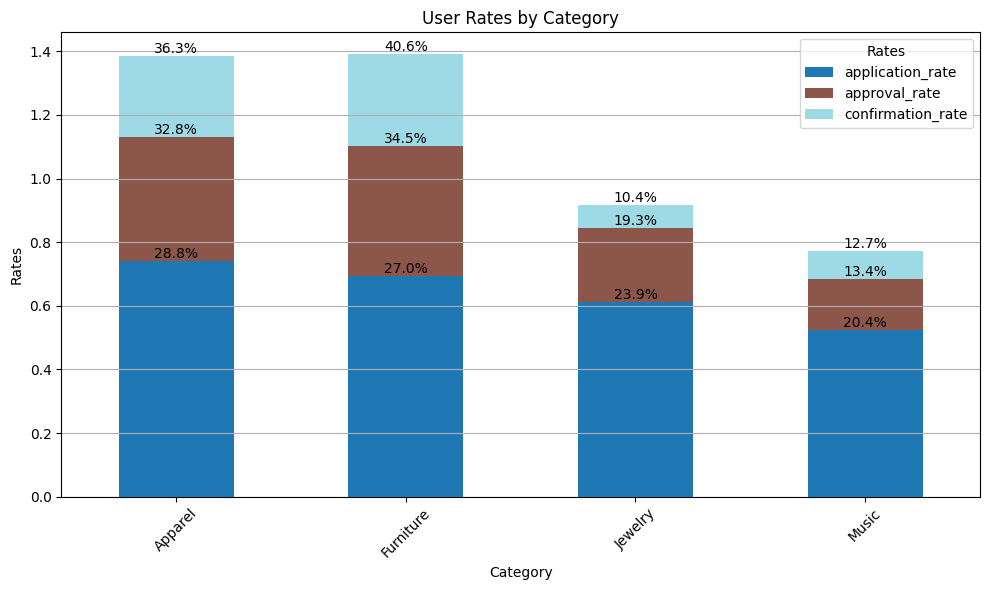

In [43]:
# Step 1: Prepare a DataFrame with only the rates and categories
rates_df = user_counts[['category', 'application_rate', 'approval_rate', 'confirmation_rate']]

# Step 2: Set the index to category and sum the rates across categories
category_totals = rates_df.groupby('category').mean().reset_index()

# Step 3: Set the index to category for plotting
category_totals.set_index('category', inplace=True)

# Step 4: Plotting the stacked bar chart
ax = category_totals.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

# Step 5: Customize the plot
plt.title('User Rates by Category')
plt.xlabel('Category')
plt.ylabel('Rates')
plt.xticks(rotation=45)
plt.legend(title='Rates')
plt.grid(axis='y')

# Step 6: Add percentage labels on top of the bars
for container in ax.containers:
    # Calculate the total for each bar
    total = container.datavalues.sum()
    # Loop through each rectangle in the container
    for bar in container:
        height = bar.get_height()
        percentage = height / total * 100  # Calculate percentage
        ax.annotate(f'{percentage:.1f}%',  # Format to 1 decimal place
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height),  # Position of the label
                    ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [24]:
# group by action and industry category
df_funnel = m_funnel.groupby(['action', 'category'])['user_id'].count().reset_index(name='user_count')
df_funnel

,action,category,user_count
0,Checkout Completed,Apparel,23923
1,Checkout Completed,Furniture,10350
2,Checkout Completed,Jewelry,526
3,Checkout Completed,Music,4637
4,Checkout Loaded,Apparel,94458
5,Checkout Loaded,Furniture,36138
6,Checkout Loaded,Jewelry,7378
7,Checkout Loaded,Music,54083
8,Loan Terms Approved,Apparel,36642
9,Loan Terms Approved,Furniture,14798


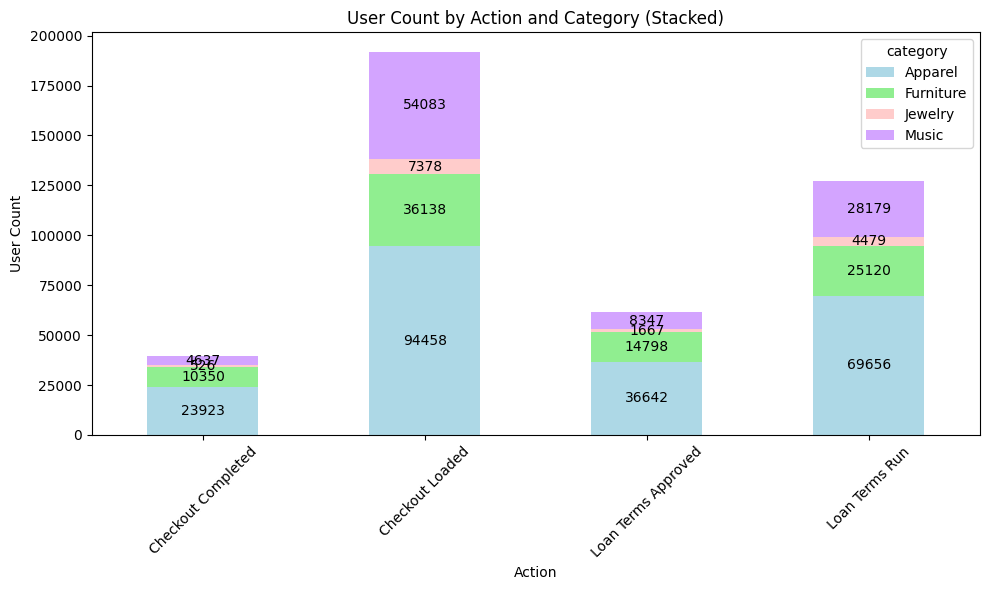

In [25]:
# Create a DataFrame
df_funnel = pd.DataFrame(df_funnel)

# Pivot the data to get 'action' as the index and 'category' as columns
df_pivot = df_funnel.pivot(index='action', columns='category', values='user_count')

# Plotting
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#add8e6', '#90ee90', '#ffcccb', '#d3a4ff'])

# Adding number labels
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Adding labels and title
plt.xlabel('Action')
plt.ylabel('User Count')
plt.title('User Count by Action and Category (Stacked)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
m_funnel.groupby(['action', 'category'])['merchant_id'].count()

action               category 
Checkout Completed   Apparel      24621
                     Furniture    10704
                     Jewelry        539
                     Music         4772
Checkout Loaded      Apparel      97282
                     Furniture    37230
                     Jewelry       7577
                     Music        55613
Loan Terms Approved  Apparel      37750
                     Furniture    15198
                     Jewelry       1725
                     Music         8591
Loan Terms Run       Apparel      71717
                     Furniture    25869
                     Jewelry       4629
                     Music        28994
Name: merchant_id, dtype: int64

## Loans & Industry

In [44]:
# # merge loans and merchants tables to insights of industry segmentation and user profile
m_loans = pd.merge(loans, merchants, on='merchant_id', how='left')
m_loans.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,revenue,merchant_name,category
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2016-02-06,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,32.3300,"Goat, LLC",Apparel
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2016-02-01,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,124.8900,Cheddar Inc.,Apparel
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,2016-03-31,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,99.7900,Pepperjack Co.,Furniture
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,2016-03-28,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,128.1550,Pepperjack Co.,Furniture
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,2016-01-05,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,138.2131,Pepperjack Co.,Furniture


In [34]:
m_loans.groupby(['user_dob_year', 'category'])['user_id'].count()

user_dob_year  category 
1899           Furniture     1
               Music         1
1900           Furniture     1
1902           Apparel       2
1916           Jewelry       1
                            ..
1996           Apparel      46
               Furniture    10
               Jewelry       4
               Music        39
1997           Music         1
Name: user_id, Length: 256, dtype: int64

In [45]:
m_loans.groupby(['category'])['revenue'].sum()

,revenue
category,
Apparel,1.152004e+06
Furniture,1.930908e+06
Jewelry,1.550654e+05
Music,2.629052e+05


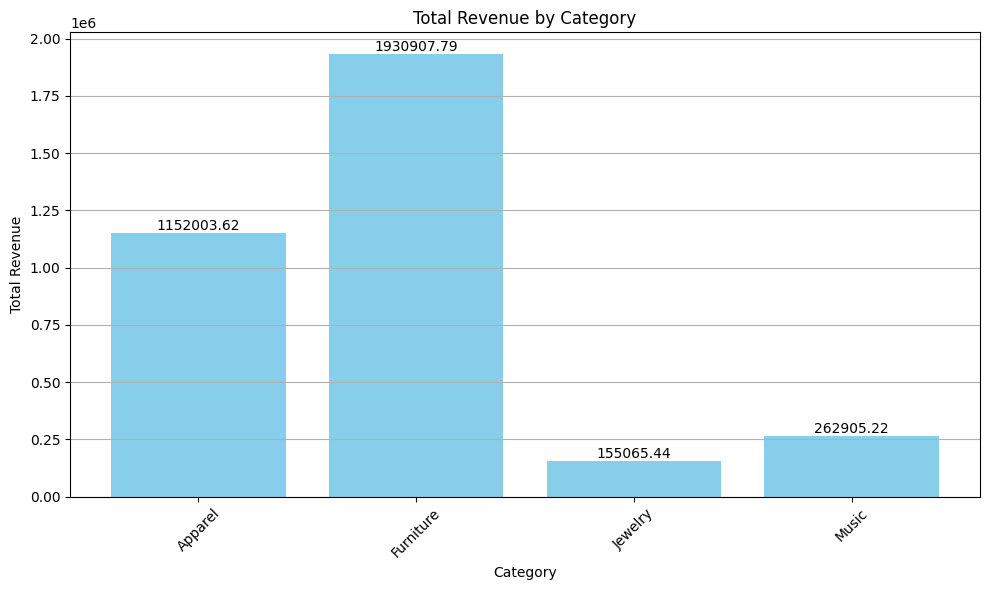

In [46]:
revenue_by_category = m_loans.groupby('category')['revenue'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_category['category'], revenue_by_category['revenue'], color='skyblue')

# Customize the plot
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.grid(axis='y')

# Step 5: Add data labels on top of the bars
for index, value in enumerate(revenue_by_category['revenue']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()